In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import contextily as cx

print(f"GeoPandas: {gpd.__version__}")
print(f"NumPy: {np.__version__}")
print(f"Pandas: {pd.__version__}")
print(f"Contextily: {cx.__version__}")

GeoPandas: 1.0.1
NumPy: 1.26.0
Pandas: 2.2.2
Contextily: 1.7.0


### Step 1 : Read Dataset & create DF

In [3]:
file_path = "./POI_geopanda.csv"
poi_df = pd.read_csv(file_path, dtype={
	'name': 'string',
	'category': 'string',
  	'lon': 'float64',
    'lat': 'float64',
	'district': 'string'
})
print(poi_df.head())

                name     category         lon       lat  district
0              Giant  supermarket  103.887950  1.379434   HOUGANG
1     NTUC FairPrice  supermarket  103.904213  1.392320  SENGKANG
2     NTUC FairPrice  supermarket  103.884137  1.357560   HOUGANG
3              Giant  supermarket  103.897037  1.381581  SENGKANG
4  Giant Hypermarket  supermarket  103.948315  1.331217     BEDOK


### Step 2 : Convert from DF to GeoDF

In [4]:
poi_features = poi_df[['name', 'category', 'district']].copy()
poi_gdf = gpd.GeoDataFrame(poi_features, geometry=gpd.points_from_xy(poi_df['lon'], poi_df['lat']))
print(poi_gdf.head())

                name     category  district                   geometry
0              Giant  supermarket   HOUGANG  POINT (103.88795 1.37943)
1     NTUC FairPrice  supermarket  SENGKANG  POINT (103.90421 1.39232)
2     NTUC FairPrice  supermarket   HOUGANG  POINT (103.88414 1.35756)
3              Giant  supermarket  SENGKANG  POINT (103.89704 1.38158)
4  Giant Hypermarket  supermarket     BEDOK  POINT (103.94831 1.33122)


### Step 3 : Coordinate Reference System 

In [5]:
# poi_gdf.crs = {'init': 'epsg:4326'}
# poi_gdf = poi_gdf.set_crs("EPSG:4326", allow_override=True)

In [6]:
# print(poi_gdf.geometry.is_valid.all())
# print(poi_gdf.geometry.head())
# print(poi_gdf.crs)  # Check coordinate reference system


In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 1. Define the Box
BBox = [103.5785, 104.1028, 1.1556, 1.4800]

# 2. Load the map image
# You must have a file named 'singapore_bg.png' in your folder for this to work
try:
    la_map = mpimg.imread('Singapore-Outline-Map.png') 
except FileNotFoundError:
    print("Error: You need a background image file (png/jpg) to use imshow.")
    # We will create a dummy placeholder just so the code runs for this example
    import numpy as np
    la_map = np.zeros((100, 100, 3)) 

# 3. Prepare Data
# Ensure we are in Lat/Lon (EPSG:4326) to match the BBox
gdf_latlon = poi_gdf.to_crs(epsg=4326)

# 4. Plot
fig, ax = plt.subplots(figsize=(18, 10))

# SCATTER plot using the geometry x (lon) and y (lat)
ax.scatter(gdf_latlon.geometry.x, 
           gdf_latlon.geometry.y, 
           zorder=2, 
           alpha=0.6, 
           c='orange', 
           edgecolors='r', 
           s=30)

ax.scatter(poi_gdf['geometry'])

ax.set_title('Singapore Postal Codes', fontsize=20)

# Set limits to the BBox
ax.set_xlim(BBox[0], BBox[1])
ax.set_ylim(BBox[2], BBox[3])

# Background Image
ax.imshow(la_map, zorder=1, extent=BBox, aspect='auto')

plt.show()
poi_gdf.plot(ax=ax, aspect=1)

ValueError: Cannot transform naive geometries.  Please set a crs on the object first.

### Step 4 : Plot POI in map

<Axes: >

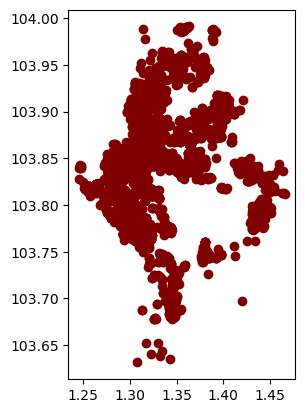

In [ ]:
# ax = singapore.plot(figsize=(20,20), color='lightgray', linestyle='-', edgecolors='k')
poi_gdf.plot(color='maroon', aspect=1)